Import Required Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


Create and View the Dataset

In [2]:
# Simulated dataset: online product purchase behavior
data = {
    'time_on_site': [5.5, 3.2, 8.7, 1.5, 9.0, 6.4, 4.3, 7.5, 2.1, 8.0],
    'click_rate': [0.2, 0.1, 0.5, 0.05, 0.6, 0.4, 0.2, 0.5, 0.1, 0.6],
    'pages_viewed': [3, 1, 7, 1, 9, 5, 2, 6, 1, 8],
    'purchase': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # 1 = bought, 0 = didn't buy
}

df = pd.DataFrame(data)
print(df.shape)
print(df.head())


(10, 4)
   time_on_site  click_rate  pages_viewed  purchase
0           5.5        0.20             3         0
1           3.2        0.10             1         0
2           8.7        0.50             7         1
3           1.5        0.05             1         0
4           9.0        0.60             9         1


Check for Missing Values

In [3]:
print(df.isnull().sum())


time_on_site    0
click_rate      0
pages_viewed    0
purchase        0
dtype: int64


Define Feature Columns and Target

In [4]:
feature_cols = ['time_on_site', 'click_rate', 'pages_viewed']
X = df[feature_cols]
y = df['purchase']


Split the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(8, 3) (8,) (2, 3) (2,)


Fit Logistic Regression Model

In [6]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Evaluate the Model

In [7]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc_score)
print("Accuracy Percentage:", int(acc_score * 100), "%")


Confusion Matrix:
 [[2]]
Accuracy Score: 1.0
Accuracy Percentage: 100 %


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Plot Confusion Matrix Heatmap

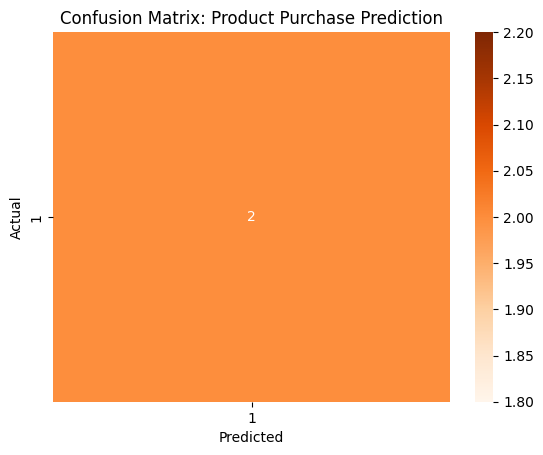

In [8]:
conf_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_df, annot=True, cmap='Oranges')
plt.title("Confusion Matrix: Product Purchase Prediction")
plt.show()
